# Fourier transform
- Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Recall integrals

In [2]:
def integralTrapezoidal(data):
    a = 0
    for i in range( len(data[0]) - 1 ):
        a = a + ( data[1,i+1] + data[1,i] ) / 2 * ( data[0,i+1] - data[0, i] )
    return a

## Fourier transform to find characteristic frequencies

\\(
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
\\)

## Use numpy module: Fast Fourier transform (FFT)

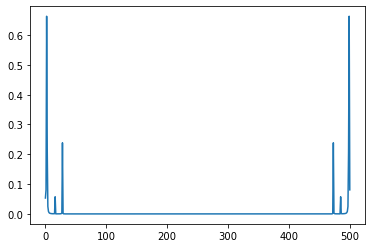

In [11]:
ft = np.fft.fft(yList)/len(yList)

plt.plot(abs(ft)**2 ) 

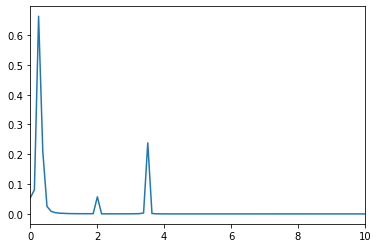

In [12]:
frequencies = np.arange(len(yList)) / ( len(yList)*0.1 )

plt.xlim([0, 10])
plt.plot( frequencies*2*np.pi, abs(ft)**2 ) 